### Project: No Show Appointments Data¶
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Model">Model Building</a></li>
</ul>

<a id='intro'></a>
## Introduction
- The selected dataset is the No show appointments dataset which contains data on patients appointment at the hospital and variables that might have influenced why these patients show up for their medical appointments or not
- The data also contains variables that can potentially be used to predict whether a patient will be present for an appointment or otherwise
- The dependent variable is the no-show column and will be analyzed in relation with other columns


## QUESTIONS
1. which gender shows up for their medical appointments more: Males or Females
2. Does the difference between the scheduled day and appointment day influence if a patient will show up for their appointment or Not?
3. Does receiving SMS messages bring about more attendance to medical appointments?
4. Which age range come for their appointments the most?
- Younger people(<=40years)?
- Older people(>40years)?
5. Does being placed on scholarship encourage attendance to medical appointments?


In [2]:
# importing the neccesary packages for my analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pickle
import requests
import json


<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load the data and check for the structure and properties of the data


### General Properties

In [3]:
# loading and performing initial inspection of data
df= pd.read_csv('noshowappointments.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#checking the tail to have a more comprehensive view of the dateset
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.shape

(110527, 14)

In [6]:
#checking for the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#checking for the statistical properties of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#checking for duplicates
sum(df.duplicated())

0

## findings so far
- The table has 110527 rows of data and 12 columns
- There is no duplicate or null values
- There are some columns that are not properly formatted

### Data Cleaning 

The dataset has no null or duplicate values. However,
- the patientId and AppointmentId are not useful for my analysis so I will remove them
- the casing of the column headers are not consistent so I will convert them to lowercase
- some columns are not correctly spelt and will be renamed
- the dates are not properly formatted
- the no-show and the gender columns will be converted to binary for easier analysis


In [9]:
#removing columns that are not important to my analysis
df.drop(columns= ['PatientId', 'AppointmentID'], inplace= True)


In [10]:
#converting scheduledday and appointmentday to datetime format
df['ScheduledDay']= df['ScheduledDay'].str.split('T', n=0, expand = True).astype('str')
df['AppointmentDay']= df['AppointmentDay'].str.split('T', n=0, expand = True).astype('str')
df['ScheduledDay']= df['ScheduledDay'].str.split('T', n=0, expand = True).astype('datetime64[ns]')
df['AppointmentDay']= df['AppointmentDay'].str.split('T', n=0, expand = True).astype('datetime64[ns]')
df

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [11]:
#converting all headers to lowercase to make it easier to work with my data and ensure some level of consistency
df.columns= df.columns.str.lower()
df.head(1)


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
#renaming columns that are not correctly spelt: hipertension and handcap 
# I will also rename no-show to present as it is more convenient 
df.rename(columns= {'hipertension': 'hypertension', 'handcap': 'handicap', 'no-show': 'present'}, inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# converting the present column to binary to aide better manipulation of data.
# 1 implies Yes meaning the patient was present
# while 0 implies No that is the patient was absent for the appointment
df['present'].replace('No',0, inplace=True)
df['present'].replace('Yes',1, inplace=True)
df['present'].value_counts()

0    88208
1    22319
Name: present, dtype: int64

In [14]:
#The age contains negative values which are less than 1 years old.
#I will replace the negative age values to 0 using the numpy.where function 
df['age']= np.where(df['age']<1, 0,df['age'])
df['age'].value_counts()


0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [15]:
# the neighborhood column is categorical. I will convert it to categorical variable by  encoding it
df['neighbourhood']= df['neighbourhood'].astype('category')
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood           category
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
present                    int64
dtype: object

In [16]:
df["neighbourhood"]= df['neighbourhood'].cat.codes

In [17]:
df.describe()

,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088883,41.737286,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110190,22.361634,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


My data is now clean enough for me to begin my exploratory data analysis

<a id='eda'></a>
## Exploratory Data Analysis

- Exploring my data to answer questions already specified above
- The no show column is being compared against the other variables

In [18]:
#Exploring the correlation between the different variables in the data
df.corr()

,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present
age,1.000000,-0.016358,-0.092457,0.504586,0.292392,0.095811,0.078033,0.012643,-0.060319
neighbourhood,-0.016358,1.000000,0.006866,0.004323,0.011347,-0.000010,0.010990,0.018269,-0.008962
scholarship,-0.092457,0.006866,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
hypertension,0.504586,0.004323,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
diabetes,0.292392,0.011347,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
alcoholism,0.095811,-0.000010,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
handicap,0.078033,0.010990,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
sms_received,0.012643,0.018269,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
present,-0.060319,-0.008962,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


### Research Question 1: (which gender shows up for their medical appointments more: Males or Females?)


In [19]:
df.groupby('gender')['present'].value_counts()

gender  present
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: present, dtype: int64

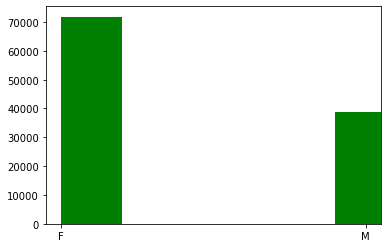

In [20]:
#creating a function called plotter that returns a chart 
def plotter(col):
    plt.hist(col,width=0.2, color='g')
plotter(df['gender'])

In [21]:
df['present'].value_counts()

0    88208
1    22319
Name: present, dtype: int64

In [22]:
df.groupby('gender')['present'].value_counts()

gender  present
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: present, dtype: int64

gender  present
F       0          51.793679
        1          13.204013
M       0          28.013065
        1           6.989242
Name: present, dtype: float64

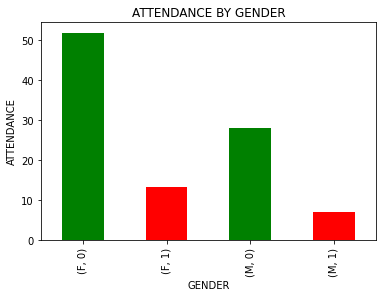

In [23]:
(df.groupby('gender')['present'].value_counts()*100/110527).plot(kind='bar', color=['g','r'])
plt.xlabel('GENDER')
plt.ylabel('ATTENDANCE')
plt.title("ATTENDANCE BY GENDER");
df.groupby('gender')['present'].value_counts()*100/110527

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


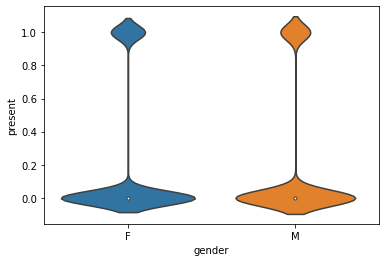

In [24]:
x= df['gender']
y=df['present']
sns.violinplot(x,y, data=df);

## Insights
- By the use of groupby and value_counts, It was found that about 71840 Female patients and 38687 males were scheduled for medical appointments
- consequently, more females were present for medical appointments with 14594 attendees and 7725 male attendees
- By calculating the percentage of total, a higher percentage of female patients showed up for medical appointments compared to males with  14594(13.2% of total)females and 7720(6% of total)males attending their appointments
- Also, based on the chart above, the attendance of females is much higher as demonstrated by the red bar 
- By the violinplot, there are more absentees for both gender

### Research Question 2: Does the difference between the scheduled day and appointment day influence if a patient will show up for their appointment or Not?

In [25]:
#creating a new column from difference between the scheduled day and the day of appointment
df['datedif']= (df['appointmentday']-df['scheduledday']).dt.days
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,datedif
0,F,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0,0


In [26]:
#finding the mean attendance of patients with relatively short duration 
#and those with longer duration between their appointments
df['datedif'].median()
short_duration= df.query('datedif<4.0')
long_duration= df.query('datedif>4.0')

mean_attendance_low= short_duration['present'].mean()
mean_attendance_high= long_duration['present'].mean()

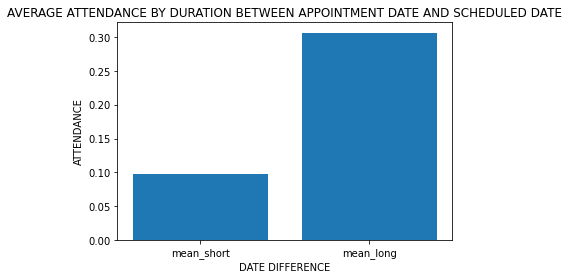

In [27]:
#visualizing the average attendance by duration
locations=[1,2]
heights=[mean_attendance_low, mean_attendance_high]
labels= ['mean_short', 'mean_long']
plt.bar(locations, heights, tick_label= labels)
plt.title('AVERAGE ATTENDANCE BY DURATION BETWEEN APPOINTMENT DATE AND SCHEDULED DATE')
plt.ylabel('ATTENDANCE')
plt.xlabel('DATE DIFFERENCE');

In [28]:
#computing the attendance of patients with short duration of appointments and those with longer durations
df.query('datedif<4.0')['present'].value_counts(),df.query('datedif>4.0')['present'].value_counts()

(0    48087
 1     5156
 Name: present, dtype: int64,
 0    36062
 1    15932
 Name: present, dtype: int64)

## Insights
- Those with shorter duration between their appointments could not attend their appointment. perhaps because they didn't have enough time to plan
- In contrast, those with longer duration recorded a much higher rate or attendance 

### Research Question 3. Does receiving SMS messages bring about more attendance to medical appointments?

In [29]:
#checking for the number of patients that showed uo for their appointments based on sms_recieved
df.groupby('sms_received')['present'].value_counts()

sms_received  present
0             0          62510
              1          12535
1             0          25698
              1           9784
Name: present, dtype: int64

In [30]:
no_sms= df.query('sms_received==0')
sms= df.query('sms_received==1')

no_sms_mean= no_sms['present'].mean()
sms_mean= sms['present'].mean()
sms_mean, no_sms_mean

(0.27574544839637, 0.16703311346525418)

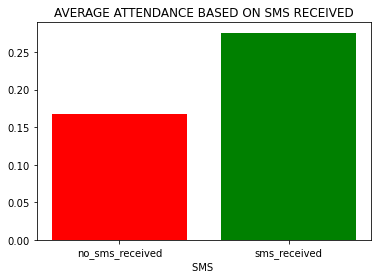

In [31]:
locations=[1,2]
heights=[no_sms_mean, sms_mean]
labels= ['no_sms_received', 'sms_received']
plt.bar(locations, heights, tick_label= labels, color= ['r','g'])
plt.title('AVERAGE ATTENDANCE BASED ON SMS RECEIVED')
#plt.ylabel('ATTENDANCE')
plt.xlabel('SMS ');

## Insights
- 74863 patients did not received sms messages. out of these, only 12535 showed up for their appointments while 62510 did not
- 35482 patients received sms messages. out of these, 9784 showed up for their appointments while 25698 did not
- On an average, A higher proportion of people who received SMS messages showed up for their appointments

## Research Question 4: Which age range come for their appointments the most?
- Younger people(<40years)? or Older people(>40years)?

In [32]:
df['age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [33]:
# Taking age 40 as the middle age between the young and the old
young= df.query('age<=40')['present'].value_counts()*100/60684
old= df.query('age>40')['present'].value_counts()*100/49843
young, old

(0    77.387779
 1    22.612221
 Name: present, dtype: float64,
 0    82.751841
 1    17.248159
 Name: present, dtype: float64)

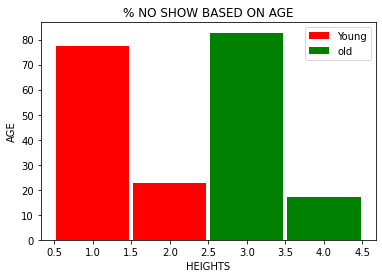

In [34]:
plt.bar([1,2],young, width=0.95, label= 'Young', color='r' )
plt.bar([3,4],old, width=0.95, label= 'old', color='g' )
plt.legend()
plt.xlabel('HEIGHTS')
plt.ylabel('AGE')
plt.title('% NO SHOW BASED ON AGE');


### findings:
- More young people were scheduled for appointments
- A higher percentage of young people(<=40years) showed up for their medical appointments(22.6%) while only 17.25% percent of old people(>40years)

### Research Question 5: Does being placed on scholarship encourage attendance to medical appointments?

In [35]:
df.groupby('scholarship')['present'].value_counts()

scholarship  present
0            0          79925
             1          19741
1            0           8283
             1           2578
Name: present, dtype: int64

In [36]:
no_scholarship= df.query('scholarship==0')
scholarship= df.query('scholarship==1')

no_scholarship_mean= no_scholarship['present'].mean()
scholarship_mean= scholarship['present'].mean()
scholarship_mean, no_scholarship_mean

(0.2373630420771568, 0.19807155900708365)

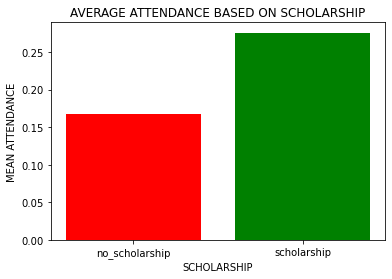

In [37]:
locations=[1,2]
heights=[no_sms_mean, sms_mean]
labels= ['no_scholarship', 'scholarship']
plt.bar(locations, heights, tick_label= labels, color= ['r','g'])
plt.title('AVERAGE ATTENDANCE BASED ON SCHOLARSHIP')
plt.ylabel('MEAN ATTENDANCE')
plt.xlabel('SCHOLARSHIP');

### Insights: 
Just a little number of patients received scholarship. however, more people who received scholarships showed up for their medical appointments as shown by the average attendance 

<a id='conclusions'></a>
## Conclusions
- majority of patients did not show up for their appointments. There are various factors that might have contributed to this:
- Most patients that were scheduled for medical appointments are females and a higher percentage of these females showed up for their appointments compared to males
- A high difference between date of appointment and scheduled date showed higher attendance compared to low difference.
- SMS seems to encourage attendance
- More young people showed up for their medical appointments
- Scholarship seems to encourage attendance

<a id='Model'></a>
### Model Building

Using logistic regression, I will now build a model which predict if a patient will show up for their medical appointment

In [38]:
# for this, i will drop

In [39]:
# #encoding the gender column  as well as  the datetime columns

df['gender']= df['gender'].astype('category')
df['scheduledday']= df['scheduledday'].astype('category')
df['appointmentday']= df['appointmentday'].astype('category')
df.dtypes

gender            category
scheduledday      category
appointmentday    category
age                  int64
neighbourhood         int8
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
present              int64
datedif              int64
dtype: object

In [40]:
df["gender"]= df['gender'].cat.codes
df["scheduledday"]= df['scheduledday'].cat.codes
df["appointmentday"]= df['appointmentday'].cat.codes

In [41]:
x=df.drop('present', axis= 1)
y= df['present']

In [42]:
x_train, x_val, y_train,y_val= train_test_split(x,y, train_size=0.65)

In [43]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(71842, 12)
(38685, 12)
(71842,)
(38685,)


In [44]:
lr= LogisticRegression()

In [45]:
#fitting the model
lr.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred= lr.predict(x_val)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
lr.score(x_val, y_val)

0.7930981000387747

The model has 79% accuracy which is not so good but still fair being my first model. I have definitely learnt a lot from doing this.

In [53]:
# using confusion matrix to check my predictions
confusion_matrix(y_pred, y_val)

array([[30562,  7755],
       [  249,   119]], dtype=int64)

In [54]:
#saving model to disk using pickle incase of deployment
pickle.dump(lr, open('model.pkl', 'wb'))

In [51]:
# loading model and making a prediction
model= pickle.load(open('model.pkl','rb'))
print(model.predict([[0,109,26,22,25,1,1,0,0,0,1,1]]))

[0]


### Final Conclusion
- model has been built and serialized into a pickle file and so can be further deployed using flask, streamlit, etc(might come back to this later)
- The insights generated can also be used to make decisions and drive business forward
